age: age of primary beneficiary
sex: insurance contractor gender, female, male
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, 
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
children: Number of children covered by health insurance / Number of dependents
smoker: Smoking
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
charges: Individual medical costs billed by health insurance

In [49]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df=pd.read_csv("E:\Alien Brains\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


In [52]:
df.shape

(1338, 7)

In [53]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [54]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [56]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


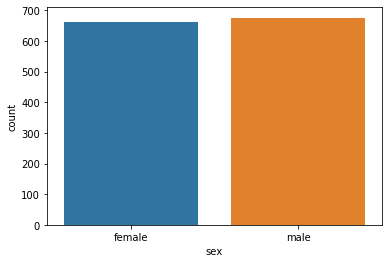

In [57]:
sns.countplot('sex',data=df)

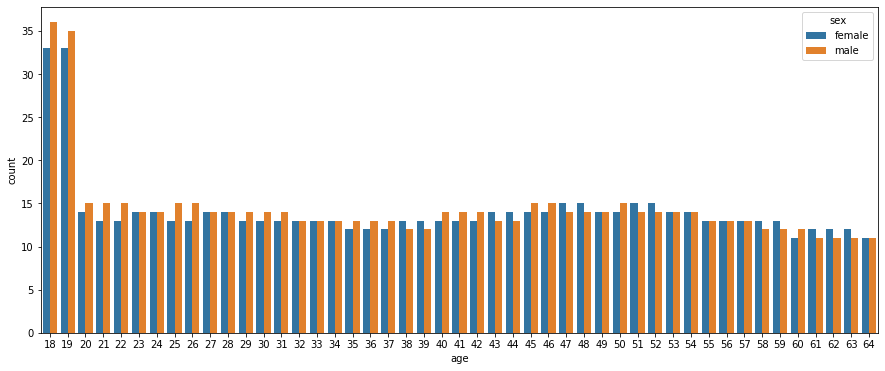

In [59]:
plt.figure(figsize=(15,6))
sns.countplot('age',hue='sex',data=df)

In [100]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['sex'] = label.fit_transform(df['sex'])
df['smoker'] = label.fit_transform(df['smoker'])

In [101]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [66]:
df_dummies = pd.get_dummies(df['region'])#here we used get_dummies()-to do the one hot encoding
#here we get-title_master/title_miss---- like this....
df = pd.concat([df, df_dummies], axis=1)#title dummies addd to the titanic dataset in column wise
df.head(10)

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,0,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,0,1,0,0
5,31,0,25.740,0,0,southeast,3756.62160,0,0,1,0
6,46,0,33.440,1,0,southeast,8240.58960,0,0,1,0
7,37,0,27.740,3,0,northwest,7281.50560,0,1,0,0
8,37,1,29.830,2,0,northeast,6406.41070,1,0,0,0
9,60,0,25.840,0,0,northwest,28923.13692,0,1,0,0


In [67]:
df=df.drop (['region'],axis=1)

In [96]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


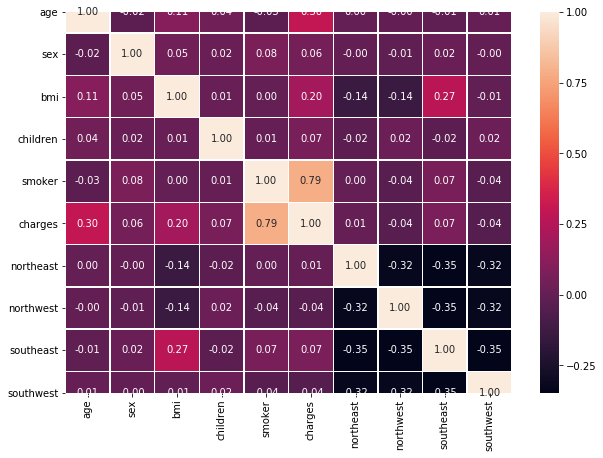

In [69]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt= '.2f')

In [70]:
df.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.002425,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,-0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


In [71]:
X = df.drop(['charges'],axis=1)
Y =df['charges']

# Building the Model

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [76]:
x_train.shape

(936, 9)

In [80]:
x_test.shape

(402, 9)

In [79]:
y_train.shape

(936,)

In [81]:
y_test.shape

(402,)

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Linear Regression

In [84]:
lr = LinearRegression() #create the object of the model
lr=lr.fit(x_train,y_train)

In [85]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [87]:
pred = lr.predict(x_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the linear regressor is: "+str(s))
print("The MsE with the linear regressor is: "+str(s1))
print("The R2_Score with the linear regressor is: "+str(s2))

The MAE with the linear regressor is: 4248.303470433445
The MsE with the linear regressor is: 35237945.78622372
The R2_Score with the linear regressor is: 0.7782101084355311


# Decision Tree Regressor

In [88]:
dtr = DecisionTreeRegressor() 
dtr=dtr.fit(x_train,y_train)

In [89]:
pred = dtr.predict(x_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the DT regressor is: "+str(s))
print("The MsE with the DT regressor is: "+str(s1))
print("The R2_Score with the DT regressor is: "+str(s2))

The MAE with the DT regressor is: 3131.317113074627
The MsE with the DT regressor is: 43530461.25543355
The R2_Score with the DT regressor is: 0.7260164840435052


# Random Forest Regressor

In [90]:
r = RandomForestRegressor()
r=r.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [91]:
pred = r.predict(x_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the RF regressor is: "+str(s))
print("The MsE with the RF regressor is: "+str(s1))
print("The R2_Score with the RF regressor is: "+str(s2))

The MAE with the RF regressor is: 2855.110710099088
The MsE with the RF regressor is: 25880769.598630667
The R2_Score with the RF regressor is: 0.8371047756952565


# K-Neighbors Regressor

In [92]:
knn=KNeighborsRegressor()
knn=knn.fit(x_train,y_train)

In [93]:
pred = knn.predict(x_test)
s=mean_absolute_error(y_test,pred)
s1=mean_squared_error(y_test,pred)
s2=r2_score(y_test,pred)

print("The MAE with the KNN regressor is: "+str(s))
print("The MsE with the KNN regressor is: "+str(s1))
print("The R2_Score with the KNN regressor is: "+str(s2))

The MAE with the KNN regressor is: 8148.845674156716
The MsE with the KNN regressor is: 139233060.34623384
The R2_Score with the KNN regressor is: 0.12365818530621897
